# EDA

## just rull all below

In [310]:
#read data
import pandas as pd
df = pd.read_csv('A2_change_job_labeled.csv')
kaggle=pd.read_csv('A2_change_job_kaggle.csv')
submission=pd.read_csv('A2_change_job_submission.csv')

In [311]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *


In [312]:
from sklearn.model_selection import GridSearchCV



In [313]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [314]:
df


,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,education_level,academic_discipline,experience,company_size,company_type,last_new_job,city_development_index,relevant_experience,training_hours,target
0,7124,0,0,0,0,0,0,0,0,0,...,Undergraduate,STEM,15,100-500,NGO,1,0.942116,Has relevant experience,21,no
1,51,0,0,1,0,0,0,0,0,0,...,Undergraduate,STEM,4,50-99,Funded startup,1,0.219561,No relevant experience,92,yes
2,13137,0,0,0,0,0,0,0,0,0,...,High School,STEM,8,50-99,Pvt Ltd,>4,0.499002,Has relevant experience,21,no
3,2769,0,0,0,0,0,0,0,0,0,...,Undergraduate,STEM,2,50-99,Pvt Ltd,never,0.351297,No relevant experience,114,no
4,8374,0,0,0,0,0,0,0,0,0,...,PhD,STEM,7,5000-9999,Public sector,1,0.626747,Has relevant experience,24,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,14834,0,0,0,0,1,0,0,0,0,...,Undergraduate,STEM,16,100-500,Pvt Ltd,1,0.942116,Has relevant experience,72,no
11490,14996,0,0,0,0,1,0,0,0,0,...,Undergraduate,Arts,9,<10,NGO,1,0.942116,Has relevant experience,37,no
11491,5960,0,0,0,0,1,0,0,0,0,...,Undergraduate,STEM,>20,100-500,Pvt Ltd,2,0.942116,Has relevant experience,4,no
11492,5867,0,0,0,0,0,0,0,0,0,...,Undergraduate,STEM,4,100-500,Pvt Ltd,never,0.351297,No relevant experience,70,yes


In [315]:
#transform target
df.loc[df['target']=='yes','target']=1
df.loc[df['target']=='no','target']=0

In [316]:
df['target'].value_counts()
df[['target']]=df[['target']].astype('int64')

In [317]:
#calcualte meam after groupby
df.groupby('gender')['target'].mean()

gender
Female    0.290297
Male      0.234185
Other     0.341176
Name: target, dtype: float64

In [318]:
df.iloc[:, list(range(1,61))+[-1]].corr().iloc[60,:].to_frame().T

,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,city.2341,...,city.75,city.76,city.83,city.89,city.90,city.998,city.97,city.98,city.99,target
target,-0.019546,-0.007297,0.043956,-0.021544,-0.04651,-0.04307,-0.023313,0.084905,-0.096497,0.032755,...,-0.041508,0.002556,-0.025587,-0.001953,0.015525,0.015434,-0.02826,-0.021226,-0.023842,1.0


In [319]:
import matplotlib.pyplot as plt

<AxesSubplot:>

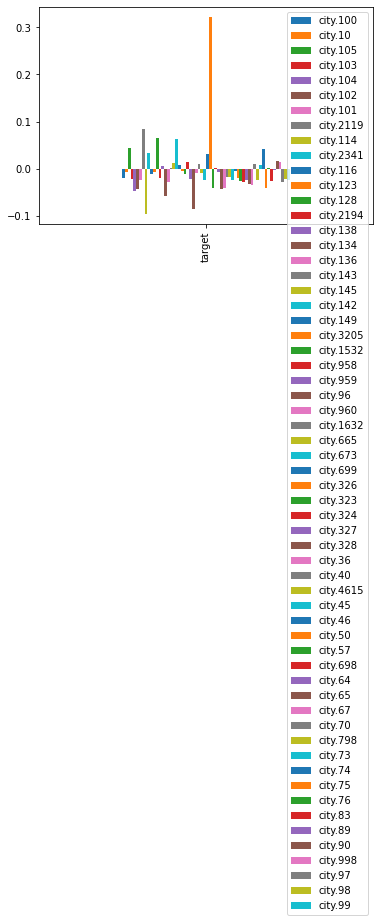

In [320]:
#bar chart of correlation
df.iloc[:, list(range(1,61))+[-1]].corr().iloc[60,0:60].to_frame().T.plot(kind='bar')

In [321]:
df.iloc[:, list(range(1,61))+[-1]].corr().iloc[60,0:60].to_frame().T.idxmax(axis=1)
#city.326 is a good feature

target    city.326
dtype: object

In [322]:
df.groupby('academic_discipline')['target'].mean()

academic_discipline
Arts               0.175879
Business degree    0.259912
Humanities         0.215569
No major           0.242268
Other              0.246528
STEM               0.247695
Name: target, dtype: float64

In [323]:
df['academic_discipline'].value_counts()

STEM               10085
Humanities           501
Other                288
Business degree      227
Arts                 199
No major             194
Name: academic_discipline, dtype: int64

In [324]:
df.loc[df['experience']=='>20','experience']="21"
df.loc[df['experience']=='<1','experience']="0"
df[['experience']]=df[['experience']].astype('int64')

In [325]:
df[['experience','target']].corr()

,experience,target
experience,1.000000,-0.179075
target,-0.179075,1.000000


In [326]:
df.groupby('experience')['target'].mean()

experience
0     0.434783
1     0.404130
2     0.331871
3     0.342266
4     0.320435
5     0.287070
6     0.289073
7     0.299517
8     0.241015
9     0.200686
10    0.217538
11    0.217284
12    0.198718
13    0.204819
14    0.180758
15    0.191781
16    0.102740
17    0.162679
18    0.127907
19    0.222857
20    0.180723
21    0.142929
Name: target, dtype: float64

In [327]:
pd.get_dummies(df[['experience','target']],columns=['experience'])

,target,experience_0,experience_1,experience_2,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,...,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_20,experience_21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11492,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [328]:
pd.get_dummies(df[['experience','target']],columns=['experience']).iloc[:,0:5].corr()

,target,experience_0,experience_1,experience_2,experience_3
target,1.000000,0.074829,0.064415,0.050696,0.062598
experience_0,0.074829,1.000000,-0.029596,-0.042705,-0.047086
experience_1,0.064415,-0.029596,1.000000,-0.043851,-0.048350
experience_2,0.050696,-0.042705,-0.043851,1.000000,-0.069766
experience_3,0.062598,-0.047086,-0.048350,-0.069766,1.000000


In [329]:
df


,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,education_level,academic_discipline,experience,company_size,company_type,last_new_job,city_development_index,relevant_experience,training_hours,target
0,7124,0,0,0,0,0,0,0,0,0,...,Undergraduate,STEM,15,100-500,NGO,1,0.942116,Has relevant experience,21,0
1,51,0,0,1,0,0,0,0,0,0,...,Undergraduate,STEM,4,50-99,Funded startup,1,0.219561,No relevant experience,92,1
2,13137,0,0,0,0,0,0,0,0,0,...,High School,STEM,8,50-99,Pvt Ltd,>4,0.499002,Has relevant experience,21,0
3,2769,0,0,0,0,0,0,0,0,0,...,Undergraduate,STEM,2,50-99,Pvt Ltd,never,0.351297,No relevant experience,114,0
4,8374,0,0,0,0,0,0,0,0,0,...,PhD,STEM,7,5000-9999,Public sector,1,0.626747,Has relevant experience,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,14834,0,0,0,0,1,0,0,0,0,...,Undergraduate,STEM,16,100-500,Pvt Ltd,1,0.942116,Has relevant experience,72,0
11490,14996,0,0,0,0,1,0,0,0,0,...,Undergraduate,Arts,9,<10,NGO,1,0.942116,Has relevant experience,37,0
11491,5960,0,0,0,0,1,0,0,0,0,...,Undergraduate,STEM,21,100-500,Pvt Ltd,2,0.942116,Has relevant experience,4,0
11492,5867,0,0,0,0,0,0,0,0,0,...,Undergraduate,STEM,4,100-500,Pvt Ltd,never,0.351297,No relevant experience,70,1


In [330]:
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()
# enc_df = pd.DataFrame(enc.fit_transform(df[['enrolled_university']]))
# enc_df.columns=['enrolled_university']

In [331]:
df['enrolled_university'].value_counts()

No enrollment    8321
Full time        2411
Part time         762
Name: enrolled_university, dtype: int64

In [332]:
df.loc[df['enrolled_university']=='Full time','enrolled_university']="2"
df.loc[df['enrolled_university']=='Part time','enrolled_university']="1"
df.loc[df['enrolled_university']=='No enrollment','enrolled_university']="0"
df[['enrolled_university']]=df[['enrolled_university']].astype('int64')

In [333]:
df['enrolled_university'].value_counts()

0    8321
2    2411
1     762
Name: enrolled_university, dtype: int64

In [334]:
pd.DataFrame(df['enrolled_university']).join(df['target']).corr()

,enrolled_university,target
enrolled_university,1.00000,0.16438
target,0.16438,1.00000


In [335]:
df['education_level'].value_counts()

Undergraduate     7066
Masters           2581
High School       1329
PhD                274
Primary School     244
Name: education_level, dtype: int64

In [336]:
df.loc[df['education_level']=='PhD','education_level']="4"
df.loc[df['education_level']=='Masters','education_level']="3"
df.loc[df['education_level']=='Undergraduate','education_level']="2"
df.loc[df['education_level']=='High School','education_level']="1"
df.loc[df['education_level']=='Primary School','education_level']="0"
df[['education_level']]=df[['education_level']].astype('int64')

In [337]:
df['education_level'].value_counts()

2    7066
3    2581
1    1329
4     274
0     244
Name: education_level, dtype: int64

In [338]:
pd.DataFrame(df['education_level']).join(df['target']).corr()

,education_level,target
education_level,1.00000,-0.00246
target,-0.00246,1.00000


In [339]:
df['company_size'].value_counts()

50-99        2282
10000+       1821
100-500      1768
<10          1435
1000-4999    1189
Oct-49       1050
5000-9999    1028
500-999       921
Name: company_size, dtype: int64

In [340]:
df.loc[df['company_size']=='<10','company_size']="0"
df.loc[df['company_size']=='Oct-49','company_size']="1"
df.loc[df['company_size']=='50-99','company_size']="2"
df.loc[df['company_size']=='100-500','company_size']="3"
df.loc[df['company_size']=='500-999','company_size']="4"
df.loc[df['company_size']=='1000-4999','company_size']="5"
df.loc[df['company_size']=='5000-9999','company_size']="6"
df.loc[df['company_size']=='10000+','company_size']="7"
df[['company_size']]=df[['company_size']].astype('int64')

In [341]:
df['company_size'].value_counts()

2    2282
7    1821
3    1768
0    1435
5    1189
1    1050
6    1028
4     921
Name: company_size, dtype: int64

In [342]:
pd.DataFrame(df['company_size']).join(df['target']).corr()

,company_size,target
company_size,1.000000,0.039761
target,0.039761,1.000000


In [343]:
df.groupby('company_type')['target'].mean()

company_type
Early stage startup    0.302935
Funded startup         0.214286
NGO                    0.271277
Other                  0.434028
Public sector          0.342715
Pvt Ltd                0.216904
Name: target, dtype: float64

In [344]:
df['last_new_job'].value_counts()

1        4907
>4       1981
2        1764
never    1582
3         637
4         623
Name: last_new_job, dtype: int64

In [345]:
df.loc[df['last_new_job']=='never','last_new_job']="0"
df.loc[df['last_new_job']=='>4','last_new_job']="5"
df[['last_new_job']]=df[['last_new_job']].astype('int64')


In [346]:
df['last_new_job'].value_counts()

1    4907
5    1981
2    1764
0    1582
3     637
4     623
Name: last_new_job, dtype: int64

In [347]:
pd.DataFrame(df['last_new_job']).join(df['target']).corr()

,last_new_job,target
last_new_job,1.000000,-0.082293
target,-0.082293,1.000000


In [348]:
df['city_development_index'].dtypes

dtype('float64')

In [349]:
pd.DataFrame(df['city_development_index']).join(df['target']).corr()

,city_development_index,target
city_development_index,1.000000,-0.345993
target,-0.345993,1.000000


In [350]:
df['relevant_experience'].value_counts()

Has relevant experience    8259
No relevant experience     3235
Name: relevant_experience, dtype: int64

In [351]:
df.groupby('relevant_experience')['target'].mean()

relevant_experience
Has relevant experience    0.207894
No relevant experience     0.340340
Name: target, dtype: float64

In [352]:
df['training_hours'].dtypes

dtype('int64')

In [353]:
pd.DataFrame(df['training_hours']).join(df['target']).corr()

,training_hours,target
training_hours,1.000000,-0.029042
target,-0.029042,1.000000


In [354]:
df.groupby('training_hours')['target'].mean()

training_hours
1      0.166667
2      0.245902
3      0.282051
4      0.177305
5      0.233333
         ...   
328    0.000000
330    0.125000
332    0.250000
334    0.166667
336    0.333333
Name: target, Length: 241, dtype: float64

In [355]:
df

,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,education_level,academic_discipline,experience,company_size,company_type,last_new_job,city_development_index,relevant_experience,training_hours,target
0,7124,0,0,0,0,0,0,0,0,0,...,2,STEM,15,3,NGO,1,0.942116,Has relevant experience,21,0
1,51,0,0,1,0,0,0,0,0,0,...,2,STEM,4,2,Funded startup,1,0.219561,No relevant experience,92,1
2,13137,0,0,0,0,0,0,0,0,0,...,1,STEM,8,2,Pvt Ltd,5,0.499002,Has relevant experience,21,0
3,2769,0,0,0,0,0,0,0,0,0,...,2,STEM,2,2,Pvt Ltd,0,0.351297,No relevant experience,114,0
4,8374,0,0,0,0,0,0,0,0,0,...,4,STEM,7,6,Public sector,1,0.626747,Has relevant experience,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,14834,0,0,0,0,1,0,0,0,0,...,2,STEM,16,3,Pvt Ltd,1,0.942116,Has relevant experience,72,0
11490,14996,0,0,0,0,1,0,0,0,0,...,2,Arts,9,0,NGO,1,0.942116,Has relevant experience,37,0
11491,5960,0,0,0,0,1,0,0,0,0,...,2,STEM,21,3,Pvt Ltd,2,0.942116,Has relevant experience,4,0
11492,5867,0,0,0,0,0,0,0,0,0,...,2,STEM,4,3,Pvt Ltd,0,0.351297,No relevant experience,70,1


In [356]:
city='city.326'
nominal=['gender','company_type','relevant_experience']
ordinal=['experience','enrolled_university','city_development_index']

In [357]:
#do onehot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[nominal]).toarray())
enc_df.columns=enc.get_feature_names_out()

In [358]:
enc_df

,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11489,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11490,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11492,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [359]:
df[[city]+ordinal]

,city.326,experience,enrolled_university,city_development_index
0,0,15,0,0.942116
1,0,4,0,0.219561
2,0,8,0,0.499002
3,1,2,2,0.351297
4,0,7,2,0.626747
...,...,...,...,...
11489,0,16,0,0.942116
11490,0,9,0,0.942116
11491,0,21,0,0.942116
11492,1,4,1,0.351297


In [360]:
#data used to train
data=df[[city]+ordinal].join(enc_df).join(pd.DataFrame(df['target']))

In [361]:
data

,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience,target
0,0,15,0,0.942116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,0,4,0,0.219561,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0,8,0,0.499002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,1,2,2,0.351297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,0,7,2,0.626747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,0,16,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
11490,0,9,0,0.942116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
11491,0,21,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
11492,1,4,1,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [362]:
data.dtypes

city.326                                         int64
experience                                       int64
enrolled_university                              int64
city_development_index                         float64
gender_Female                                  float64
gender_Male                                    float64
gender_Other                                   float64
company_type_Early stage startup               float64
company_type_Funded startup                    float64
company_type_NGO                               float64
company_type_Other                             float64
company_type_Public sector                     float64
company_type_Pvt Ltd                           float64
relevant_experience_Has relevant experience    float64
relevant_experience_No relevant experience     float64
target                                           int64
dtype: object

In [363]:
#preprocessing 
def dw(df):
    df.loc[df['target']=='yes','target']=1
    df.loc[df['target']=='no','target']=0
    df[['target']]=df[['target']].astype('int64')
    df.loc[df['experience']=='>20','experience']="21"
    df.loc[df['experience']=='<1','experience']="0"
    df[['experience']]=df[['experience']].astype('int64')
    df.loc[df['enrolled_university']=='Full time','enrolled_university']="2"
    df.loc[df['enrolled_university']=='Part time','enrolled_university']="1"
    df.loc[df['enrolled_university']=='No enrollment','enrolled_university']="0"
    df[['enrolled_university']]=df[['enrolled_university']].astype('int64')
    df.loc[df['education_level']=='PhD','education_level']="4"
    df.loc[df['education_level']=='Masters','education_level']="3"
    df.loc[df['education_level']=='Undergraduate','education_level']="2"
    df.loc[df['education_level']=='High School','education_level']="1"
    df.loc[df['education_level']=='Primary School','education_level']="0"
    df[['education_level']]=df[['education_level']].astype('int64')
    df.loc[df['company_size']=='<10','company_size']="0"
    df.loc[df['company_size']=='Oct-49','company_size']="1"
    df.loc[df['company_size']=='50-99','company_size']="2"
    df.loc[df['company_size']=='100-500','company_size']="3"
    df.loc[df['company_size']=='500-999','company_size']="4"
    df.loc[df['company_size']=='1000-4999','company_size']="5"
    df.loc[df['company_size']=='5000-9999','company_size']="6"
    df.loc[df['company_size']=='10000+','company_size']="7"
    df[['company_size']]=df[['company_size']].astype('int64')
    df.loc[df['last_new_job']=='never','last_new_job']="0"
    df.loc[df['last_new_job']=='>4','last_new_job']="5"
    df[['last_new_job']]=df[['last_new_job']].astype('int64')
    return df

In [364]:
kaggle=dw(kaggle)

In [365]:
submission=dw(submission)

In [366]:
submission

,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,education_level,academic_discipline,experience,company_size,company_type,last_new_job,city_development_index,relevant_experience,training_hours,target
0,12321,0,0,0,0,1,0,0,0,0,...,3,STEM,21,6,Pvt Ltd,5,0.942116,Has relevant experience,26,0
1,941,0,0,0,0,0,0,0,0,0,...,3,STEM,21,3,Pvt Ltd,2,0.834331,Has relevant experience,78,0
2,17715,0,0,0,0,0,0,0,0,0,...,2,STEM,21,1,Pvt Ltd,2,0.922156,Has relevant experience,32,0
3,6540,0,0,0,0,1,0,0,0,0,...,2,Business degree,11,6,Pvt Ltd,2,0.942116,Has relevant experience,7,0
4,6760,0,0,0,0,0,0,0,0,0,...,2,STEM,5,3,Pvt Ltd,0,0.351297,Has relevant experience,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,16978,0,0,0,0,0,0,0,0,1,...,3,STEM,13,1,Public sector,2,0.954092,Has relevant experience,80,0
3828,7393,0,0,0,0,0,0,0,0,1,...,3,STEM,19,7,Pvt Ltd,5,0.954092,No relevant experience,44,0
3829,2468,0,0,0,0,0,0,0,0,0,...,2,STEM,4,2,Funded startup,1,0.894212,Has relevant experience,66,0
3830,10061,0,0,0,0,0,0,0,0,0,...,2,STEM,17,6,Pvt Ltd,2,0.922156,Has relevant experience,52,0


In [367]:
kaggle

,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,education_level,academic_discipline,experience,company_size,company_type,last_new_job,city_development_index,relevant_experience,training_hours,target
0,1,0,0,0,0,1,0,0,0,0,...,2,STEM,21,4,Other,1,0.942116,Has relevant experience,36,0
1,3,0,0,0,0,0,0,0,0,0,...,2,STEM,5,2,Pvt Ltd,0,0.351297,No relevant experience,83,0
2,7,0,0,0,0,0,0,0,0,0,...,1,No major,5,2,Funded startup,1,0.942116,Has relevant experience,24,0
3,12,0,0,0,0,1,0,0,0,0,...,2,STEM,5,6,Pvt Ltd,1,0.942116,Has relevant experience,108,0
4,15,0,0,0,0,0,0,0,0,0,...,1,STEM,5,0,Early stage startup,0,0.351297,No relevant experience,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,19133,0,0,0,0,0,0,0,0,0,...,2,STEM,10,4,Pvt Ltd,1,0.888224,Has relevant experience,67,0
3828,19143,0,0,0,0,0,0,0,0,0,...,2,Arts,5,1,Early stage startup,1,0.654691,Has relevant experience,26,0
3829,19145,0,0,0,0,0,0,0,0,0,...,2,STEM,4,1,Pvt Ltd,0,0.351297,No relevant experience,48,0
3830,19150,0,0,0,0,1,0,0,0,0,...,3,STEM,9,2,Pvt Ltd,1,0.942116,Has relevant experience,36,0


In [368]:
#onehot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_kaggle = pd.DataFrame(enc.fit_transform(kaggle[nominal]).toarray())
enc_kaggle.columns=enc.get_feature_names_out()

In [369]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_submission = pd.DataFrame(enc.fit_transform(submission[nominal]).toarray())
enc_submission.columns=enc.get_feature_names_out()

In [370]:
kaggle

,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,education_level,academic_discipline,experience,company_size,company_type,last_new_job,city_development_index,relevant_experience,training_hours,target
0,1,0,0,0,0,1,0,0,0,0,...,2,STEM,21,4,Other,1,0.942116,Has relevant experience,36,0
1,3,0,0,0,0,0,0,0,0,0,...,2,STEM,5,2,Pvt Ltd,0,0.351297,No relevant experience,83,0
2,7,0,0,0,0,0,0,0,0,0,...,1,No major,5,2,Funded startup,1,0.942116,Has relevant experience,24,0
3,12,0,0,0,0,1,0,0,0,0,...,2,STEM,5,6,Pvt Ltd,1,0.942116,Has relevant experience,108,0
4,15,0,0,0,0,0,0,0,0,0,...,1,STEM,5,0,Early stage startup,0,0.351297,No relevant experience,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,19133,0,0,0,0,0,0,0,0,0,...,2,STEM,10,4,Pvt Ltd,1,0.888224,Has relevant experience,67,0
3828,19143,0,0,0,0,0,0,0,0,0,...,2,Arts,5,1,Early stage startup,1,0.654691,Has relevant experience,26,0
3829,19145,0,0,0,0,0,0,0,0,0,...,2,STEM,4,1,Pvt Ltd,0,0.351297,No relevant experience,48,0
3830,19150,0,0,0,0,1,0,0,0,0,...,3,STEM,9,2,Pvt Ltd,1,0.942116,Has relevant experience,36,0


In [371]:
submission

,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,education_level,academic_discipline,experience,company_size,company_type,last_new_job,city_development_index,relevant_experience,training_hours,target
0,12321,0,0,0,0,1,0,0,0,0,...,3,STEM,21,6,Pvt Ltd,5,0.942116,Has relevant experience,26,0
1,941,0,0,0,0,0,0,0,0,0,...,3,STEM,21,3,Pvt Ltd,2,0.834331,Has relevant experience,78,0
2,17715,0,0,0,0,0,0,0,0,0,...,2,STEM,21,1,Pvt Ltd,2,0.922156,Has relevant experience,32,0
3,6540,0,0,0,0,1,0,0,0,0,...,2,Business degree,11,6,Pvt Ltd,2,0.942116,Has relevant experience,7,0
4,6760,0,0,0,0,0,0,0,0,0,...,2,STEM,5,3,Pvt Ltd,0,0.351297,Has relevant experience,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,16978,0,0,0,0,0,0,0,0,1,...,3,STEM,13,1,Public sector,2,0.954092,Has relevant experience,80,0
3828,7393,0,0,0,0,0,0,0,0,1,...,3,STEM,19,7,Pvt Ltd,5,0.954092,No relevant experience,44,0
3829,2468,0,0,0,0,0,0,0,0,0,...,2,STEM,4,2,Funded startup,1,0.894212,Has relevant experience,66,0
3830,10061,0,0,0,0,0,0,0,0,0,...,2,STEM,17,6,Pvt Ltd,2,0.922156,Has relevant experience,52,0


In [372]:
kaggle=kaggle[[city]+ordinal].join(enc_kaggle)

In [373]:
submission=submission[[city]+ordinal].join(enc_submission)

In [374]:
submission

,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
0,0,21,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,21,0,0.834331,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,21,0,0.922156,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,11,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,5,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,0,13,2,0.954092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3828,0,19,0,0.954092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3829,0,4,0,0.894212,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3830,0,17,0,0.922156,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [375]:
kaggle

,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
0,0,21,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,5,2,0.351297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0,5,0,0.942116,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,5,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,5,2,0.351297,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,0,10,0,0.888224,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3828,0,5,0,0.654691,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3829,1,4,2,0.351297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3830,0,9,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [376]:
kaggle.dtypes

city.326                                         int64
experience                                       int64
enrolled_university                              int64
city_development_index                         float64
gender_Female                                  float64
gender_Male                                    float64
gender_Other                                   float64
company_type_Early stage startup               float64
company_type_Funded startup                    float64
company_type_NGO                               float64
company_type_Other                             float64
company_type_Public sector                     float64
company_type_Pvt Ltd                           float64
relevant_experience_Has relevant experience    float64
relevant_experience_No relevant experience     float64
dtype: object

In [377]:
submission.dtypes

city.326                                         int64
experience                                       int64
enrolled_university                              int64
city_development_index                         float64
gender_Female                                  float64
gender_Male                                    float64
gender_Other                                   float64
company_type_Early stage startup               float64
company_type_Funded startup                    float64
company_type_NGO                               float64
company_type_Other                             float64
company_type_Public sector                     float64
company_type_Pvt Ltd                           float64
relevant_experience_Has relevant experience    float64
relevant_experience_No relevant experience     float64
dtype: object

# split

In [378]:
#split into train  and test
y=data['target'].to_numpy()

In [379]:
X=data.drop(['target'],axis=1)

In [380]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [381]:
X_train

,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
11417,0,21,0,0.950100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1847,1,7,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7669,0,9,2,0.499002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2445,0,21,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9695,0,13,0,0.942116,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0,9,1,0.774451,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10955,0,9,0,0.894212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
905,0,21,0,0.922156,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5192,0,21,0,0.928144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# imbalance

In [382]:
ros=RandomOverSampler(random_state=1)
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)

In [383]:
X_train_ros

,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
0,0,21,0,0.950100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,7,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,9,2,0.499002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,21,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,13,0,0.942116,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15659,0,21,0,0.952096,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15660,1,2,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15661,1,10,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15662,0,2,0,0.942116,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# GBM

In [384]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [385]:
gbm = GradientBoostingClassifier(random_state=0)

In [386]:
grid={'n_estimators':[150],'learning_rate':[0.04],'max_depth':[5],'subsample':[0.7]}

In [387]:
grid_gbm=GridSearchCV(gbm,grid,scoring='f1_macro',refit=True,verbose=1,cv=5)
grid_search_gbm=grid_gbm.fit(X_train_ros,y_train_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [388]:
grid_search_gbm.best_params_

{'learning_rate': 0.04, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.7}

In [389]:
ytest_predictions = grid_search_gbm.predict(X_test) 

In [390]:
ytrain_predictions= grid_search_gbm.predict(X_train) 

In [391]:
ytest_predictions

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [392]:
grid_gbm.predict(X_test) 

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [393]:
train_f1=f1_score(y_train,ytrain_predictions,average='macro')
train_f1

0.7190615574205987

In [394]:
test_accuracy=accuracy_score(y_test,ytest_predictions)*100
test_f1=f1_score(y_test,ytest_predictions,average='macro')


In [395]:
test_accuracy

74.86956521739131

In [396]:

test_f1

0.7067349054730759

In [397]:
print(classification_report(y_train,ytrain_predictions))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      7832
           1       0.52      0.70      0.60      2512

    accuracy                           0.77     10344
   macro avg       0.71      0.75      0.72     10344
weighted avg       0.80      0.77      0.78     10344



In [398]:
print(classification_report(y_test,ytest_predictions))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       844
           1       0.52      0.70      0.60       306

    accuracy                           0.75      1150
   macro avg       0.70      0.73      0.71      1150
weighted avg       0.78      0.75      0.76      1150



In [399]:
kaggle_predictions = grid_search_gbm.predict(kaggle) 

In [400]:
submission_prediction=grid_search_gbm.predict(submission)

In [401]:
kaggle_predictions

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [402]:
submission_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [403]:
submissioncid=pd.read_csv('A2_change_job_submission.csv')

In [404]:
kagglecid=pd.read_csv('A2_change_job_kaggle.csv')

In [405]:
pd.DataFrame(kaggle_predictions)

,0
0,1
1,1
2,0
3,0
4,1
...,...
3827,0
3828,0
3829,1
3830,0


In [406]:
pd.DataFrame(kagglecid['cid']).join(pd.DataFrame(kaggle_predictions))

,cid,0
0,1,1
1,3,1
2,7,0
3,12,0
4,15,1
...,...,...
3827,19133,0
3828,19143,0
3829,19145,1
3830,19150,0


In [407]:
df_kaggle = pd.DataFrame(kagglecid['cid']).join(pd.DataFrame(kaggle_predictions)).copy().rename(columns={ 0: 'target'})

In [408]:
df_submission=pd.DataFrame(submissioncid['cid']).join(pd.DataFrame(submission_prediction)).copy().rename(columns={ 0: 'target'})

In [409]:
df_kaggle

,cid,target
0,1,1
1,3,1
2,7,0
3,12,0
4,15,1
...,...,...
3827,19133,0
3828,19143,0
3829,19145,1
3830,19150,0


In [410]:
df_submission

,cid,target
0,12321,0
1,941,0
2,17715,0
3,6540,0
4,6760,1
...,...,...
3827,16978,0
3828,7393,0
3829,2468,0
3830,10061,0


In [411]:
df_submission.loc[df_submission['target']==1,'target']="yes"
df_submission.loc[df_submission['target']==0,'target']="no"
df_submission[['target']]=df_submission[['target']].astype('str')

In [412]:
df_submission

,cid,target
0,12321,no
1,941,no
2,17715,no
3,6540,no
4,6760,yes
...,...,...
3827,16978,no
3828,7393,no
3829,2468,no
3830,10061,no


In [413]:
df_submission.dtypes

cid        int64
target    object
dtype: object

In [414]:
df_kaggle.to_csv('out.csv',index=False)

In [415]:
df_submission.to_csv('pred_labels.csv',index=False)